In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [432]:
df = pd.read_csv("dataset.csv")

In [433]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [434]:
df.columns = df.columns.str.strip()

In [435]:
df.shape

(400, 9)

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [437]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [438]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<Axes: xlabel='Chance of Admit', ylabel='Count'>

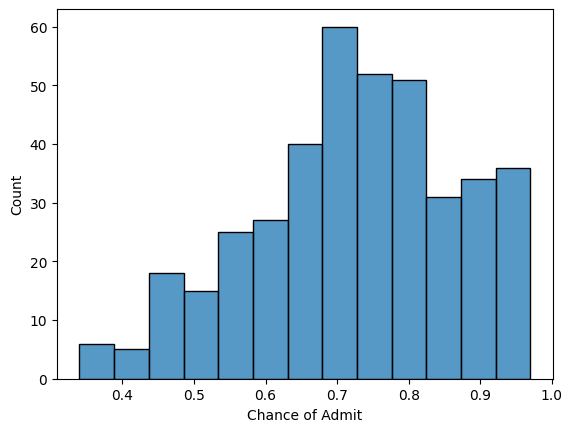

In [439]:
sns.histplot(x= df['Chance of Admit'])

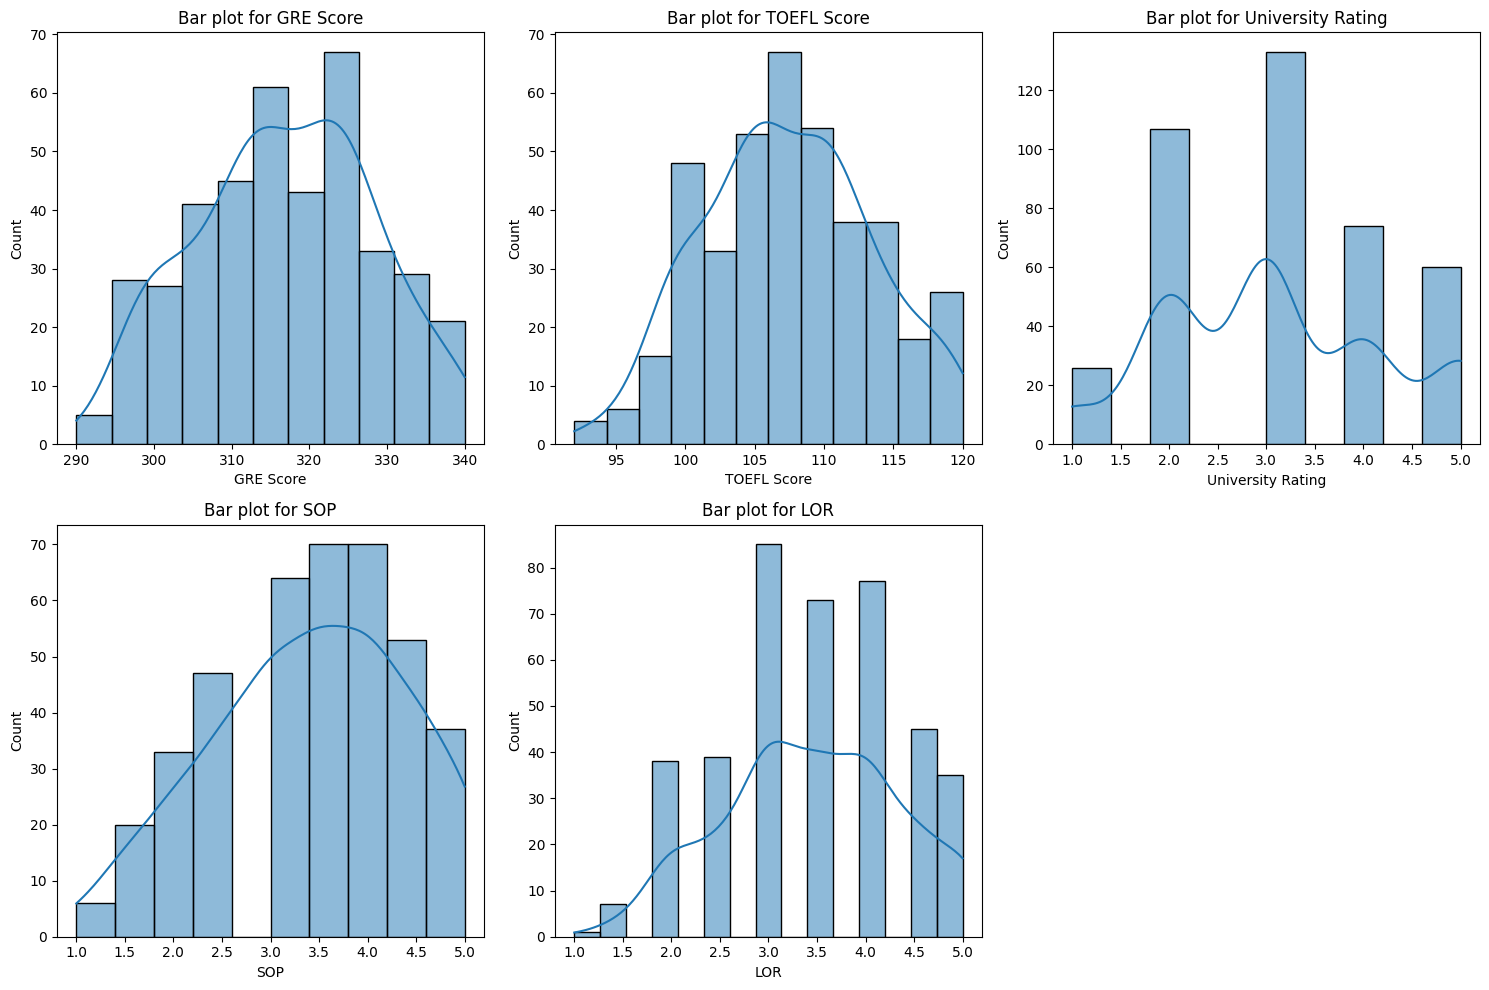

In [440]:
plt.figure(figsize=(15,10))

for i,column in enumerate(['GRE Score', 'TOEFL Score' ,'University Rating', 'SOP' , 'LOR'  ]):
    plt.subplot(2,3 ,i+1)
    sns.histplot( df[column], kde = True)
    plt.title(f"Bar plot for {column}")
plt.tight_layout()

<Axes: xlabel='Research', ylabel='count'>

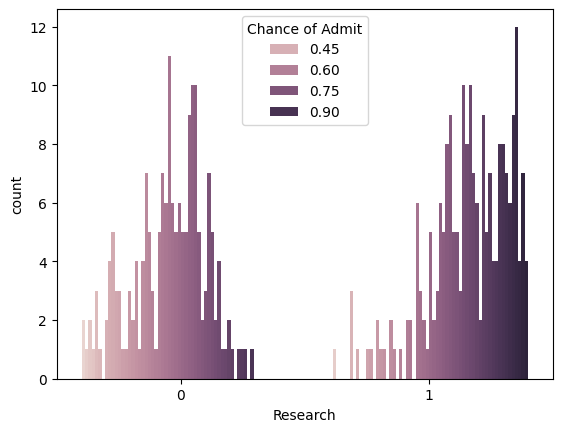

In [441]:
sns.countplot(x = df['Research'], hue = df['Chance of Admit'] )

<Axes: >

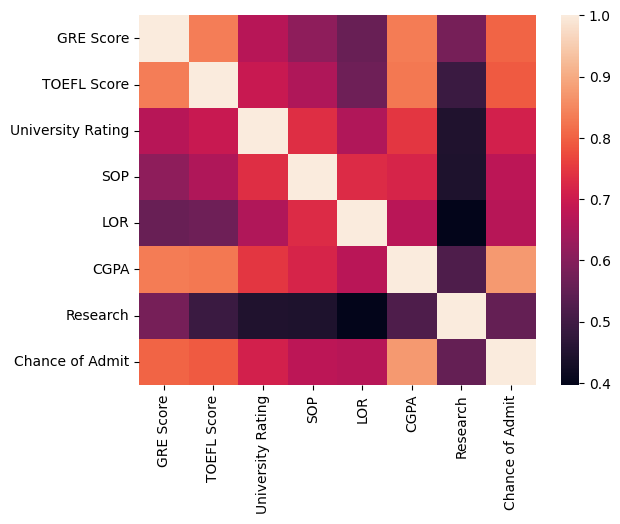

In [459]:
sns.heatmap(df.corr())

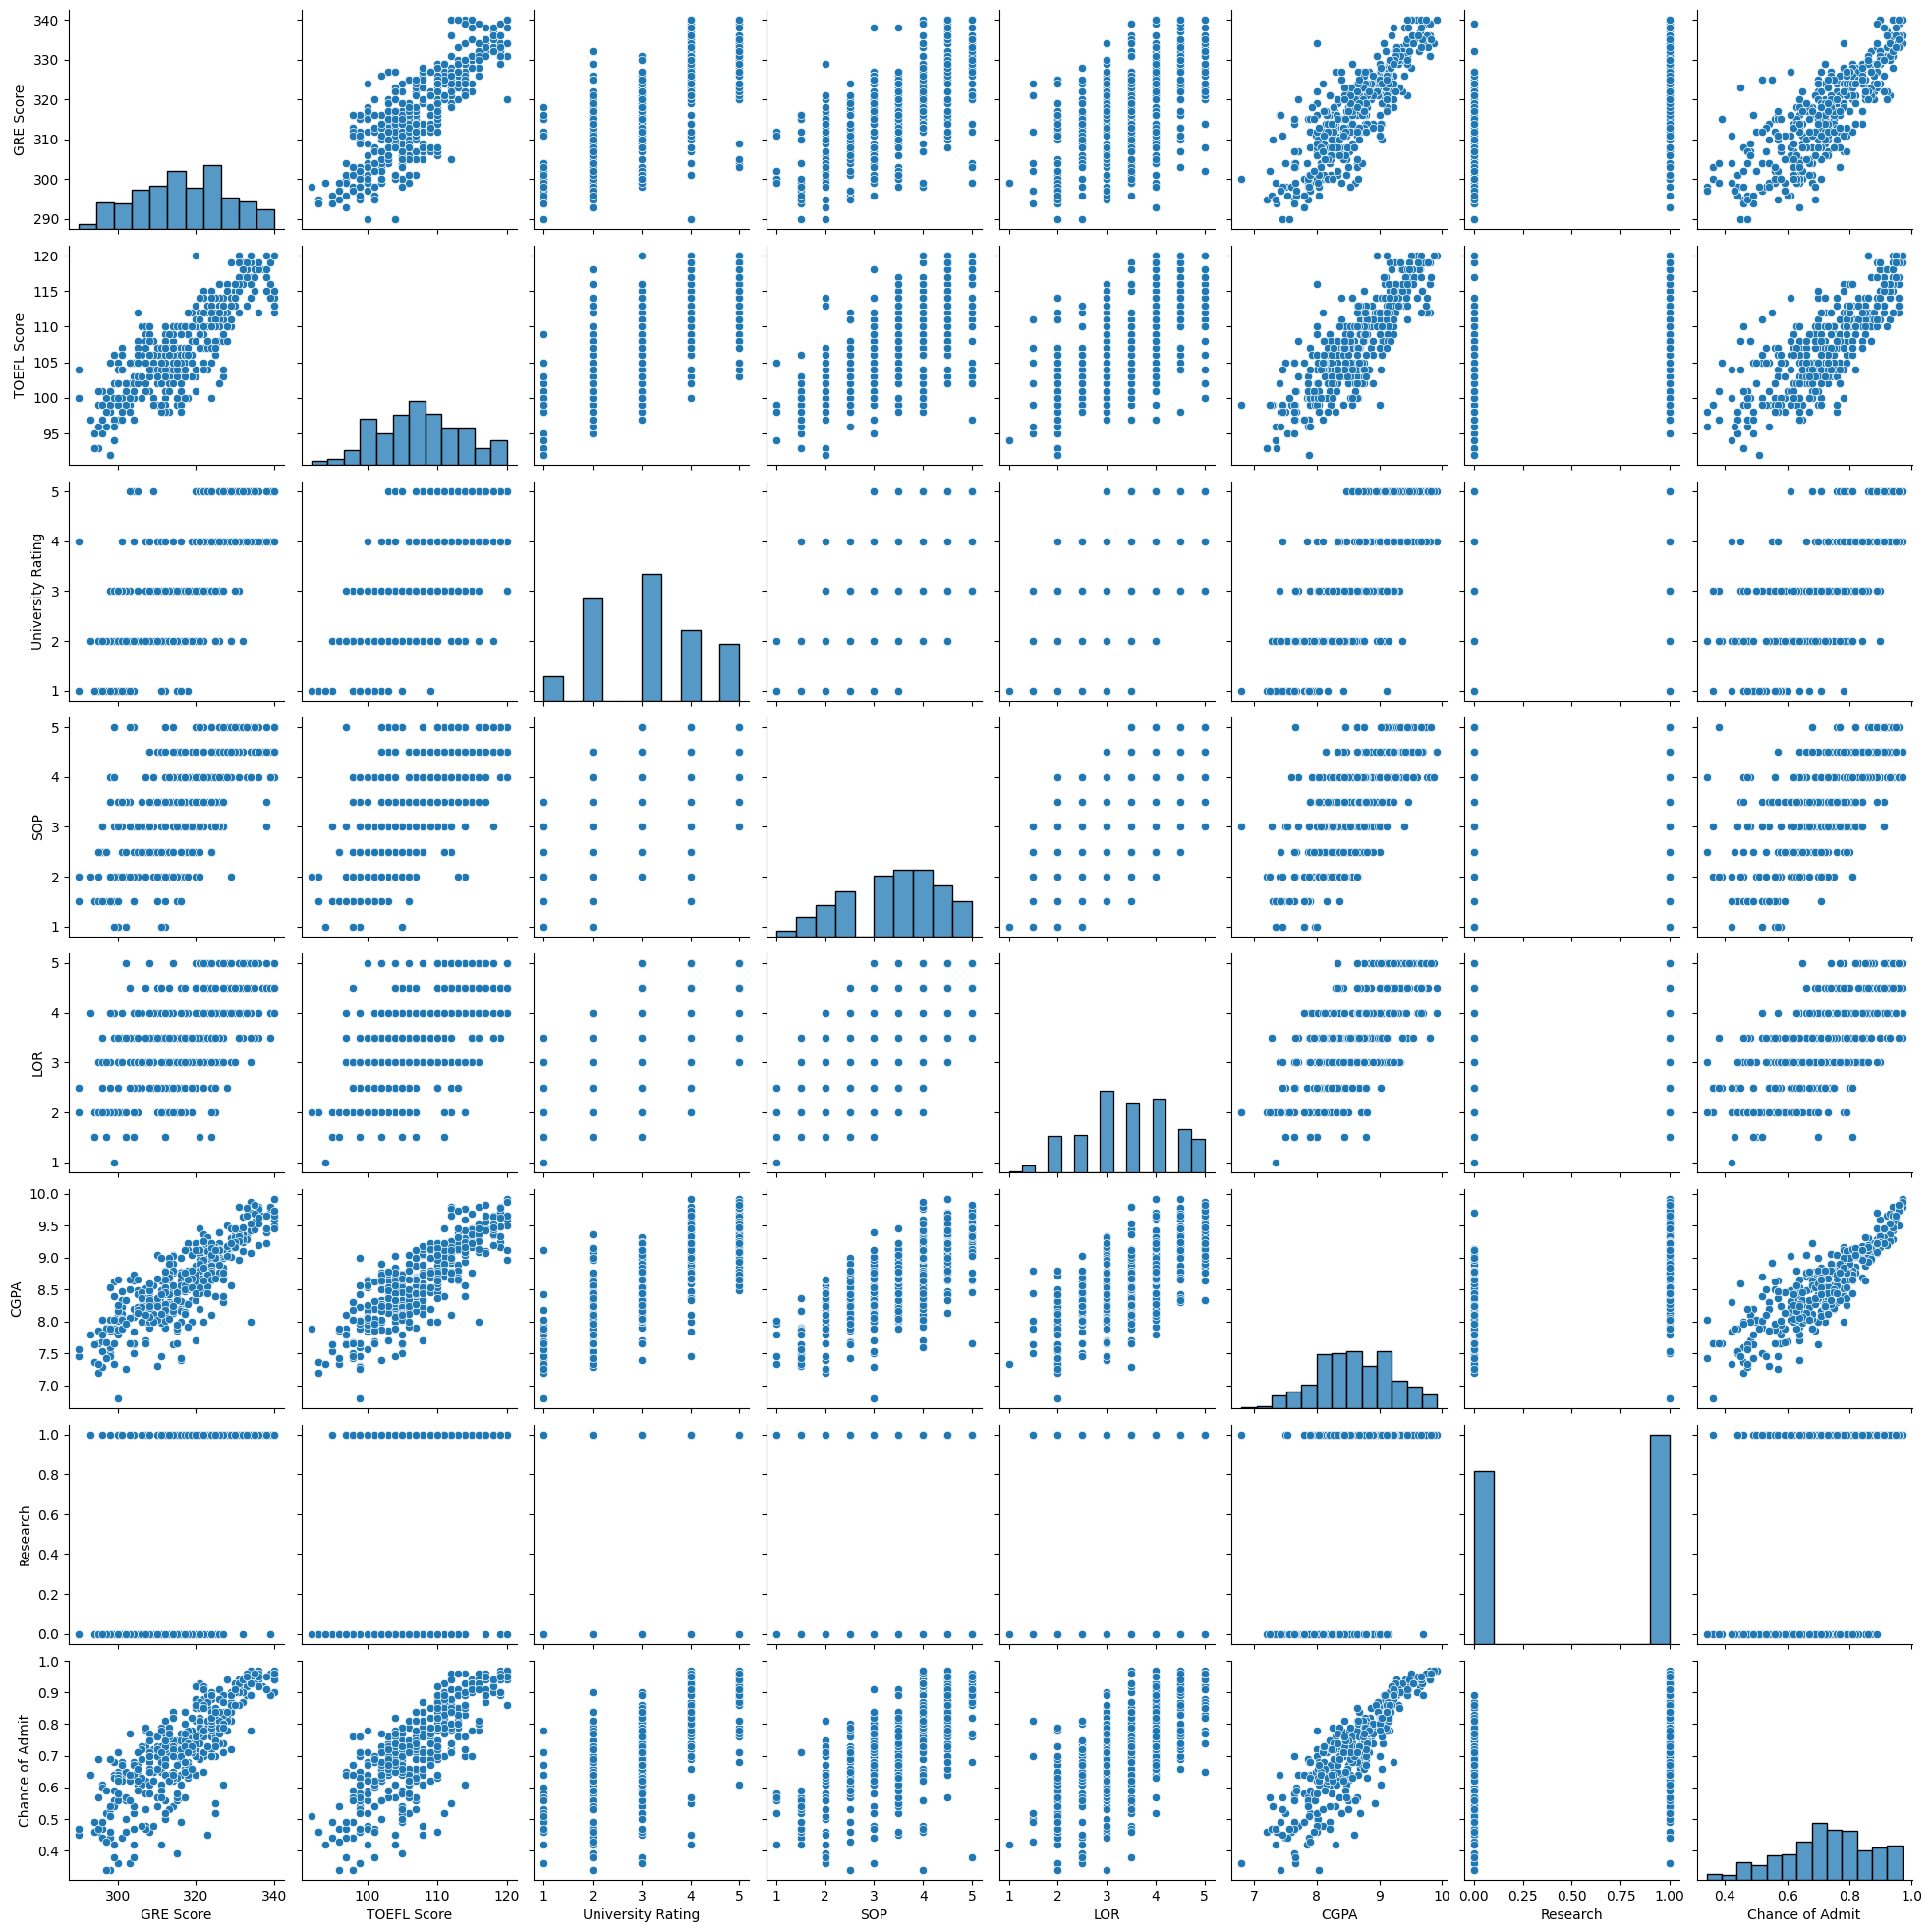

In [460]:
sns.pairplot(df)

In [442]:
df =df.drop('Serial No.', axis = 1)

In [443]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [444]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [445]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [446]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [447]:
X_train

array([[0.64      , 0.59259259, 1.        , ..., 0.625     , 0.64102564,
        0.        ],
       [0.48      , 0.55555556, 0.75      , ..., 0.75      , 0.71794872,
        1.        ],
       [0.32      , 0.25925926, 0.25      , ..., 0.5       , 0.38461538,
        0.        ],
       ...,
       [0.72      , 0.7037037 , 0.5       , ..., 0.5       , 0.73717949,
        1.        ],
       [0.72      , 0.7037037 , 0.5       , ..., 0.5       , 0.72115385,
        1.        ],
       [0.5       , 0.44444444, 0.25      , ..., 0.375     , 0.2724359 ,
        0.        ]])

In [448]:
X_train.shape

(320, 7)

In [449]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [461]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim = 7 ))
model.add(Dense(32, activation='relu',  ))
model.add(Dense(1, activation= 'linear'))

c:\Users\adpub\anaconda3\envs\my_ml_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [462]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [463]:
model.compile( loss = 'mean_squared_error', metrics= ['mse'], optimizer= 'Adam')

In [464]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.3228 - mse: 0.3228 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - ms

In [465]:
Y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [466]:
from sklearn.metrics import r2_score
print(r2_score(Y_test, Y_pred))

0.8128142006061991


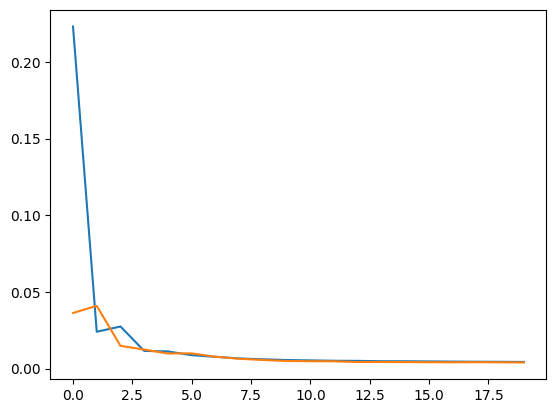

In [467]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

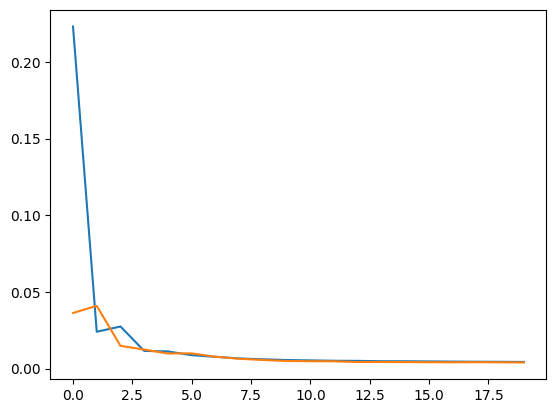

In [468]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])